# Celestial coordinates

The [astropy.coordinates](https://docs.astropy.org/en/stable/coordinates/index.html) sub-package in astropy provides a way to represent and manipulate celestial coordinates. It supports many different coordinate systems and transformations, and includes support for velocities in addition to positions.


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Create SkyCoord objects</li>
<li>Access individual coordinates</li>
<li>Format coordinates</li>
<li>Transforming coordinates</li>
<li>Using 3D coordinates and velocities</li>
<li>Calculating separations</li>
<li>Using arrays of coordinates</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.coordinates. For more information about the features presented below as well as other available features, you can read the
[astropy.coordinates documentation](https://docs.astropy.org/en/stable/coordinates/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Creating SkyCoord objects

The main user-facing class in astropy.coordinates is the ``SkyCoord`` class:

In [2]:
from astropy.coordinates import SkyCoord

A SkyCoord object can represent one or more coordinates, and there are a number of different ways to initialize such an object. If you have the coordinates as quantities, you can do:

In [3]:
import astropy.units as u
coord1 = SkyCoord(13.443 * u.deg, -33.298 * u.deg)
coord1

<SkyCoord (ICRS): (ra, dec) in deg
    (13.443, -33.298)>

As you can see, the default is to assume that the coordinates are in the ICRS frame and represent Right Ascension and Declination. You can also initialize coordinates from strings:

In [4]:
coord2 = SkyCoord('13:18:22', '-21:43:34', unit=(u.hourangle, u.deg))
coord2

<SkyCoord (ICRS): (ra, dec) in deg
    (199.59166667, -21.72611111)>

In [5]:
coord3 = SkyCoord('13h18m22s -21d43m34s')
coord3

<SkyCoord (ICRS): (ra, dec) in deg
    (199.59166667, -21.72611111)>

To create coordinates in other frames - for example Galactic coordinates - you can use the ``frame=`` argument:

In [6]:
coord4 = SkyCoord(l=13.4 * u.deg, b=0.1 * u.deg, frame='galactic')
coord4

<SkyCoord (Galactic): (l, b) in deg
    (13.4, 0.1)>

Note that here we've also specified the names of the coordinates explicitly using ``l=`` and ``b=`` (they are not required but can make code more readable).

## Initialization from SIMBAD identifier

If you are doing quick calculations and want to use the coordinates of a source in the SIMBAD database, you can easily create a ``SkyCoord`` object from the object name:

In [7]:
m42 = SkyCoord.from_name('M42')
m42

<SkyCoord (ICRS): (ra, dec) in deg
    (83.82208333, -5.39111111)>

However, note that this should not be used when precision is critical - the positions are approximate especially for extended sources.

## Accessing individual coordinates

Once you have a coordinate object, you can access the individual coordinates using attributes:

In [8]:
coord3.ra

<Longitude 199.59166667 deg>

In [9]:
type(coord3.ra)

astropy.coordinates.angles.Longitude

The Longitude class is a sub-class of Quantity so you can convert it to specific units as you would a quantity:

In [10]:
coord3.ra.to(u.hourangle).value

13.306111111111113

but the Longitude class also provides shortcuts for this:

In [11]:
coord3.ra.hourangle

13.306111111111113

## Formatting coordinates

You can format a coordinate object as a string using ``to_string()``:

In [12]:
coord3.to_string()

'199.592 -21.7261'

The default format uses floating point values, but you may want instead to use standard sexagesimal format: 

In [13]:
coord2.to_string('hmsdms')

'13h18m22s -21d43m34s'

You can control the precision using the ``precision=`` keyword argument:

In [14]:
coord2.to_string('hmsdms', precision=5)

'13h18m22.00000s -21d43m34.00000s'

## Transforming coordinates

``SkyCoord`` objects can be transformed between frames using the ``.transform_to()`` method:

In [15]:
coord1

<SkyCoord (ICRS): (ra, dec) in deg
    (13.443, -33.298)>

In [16]:
coord1.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (298.40424611, -83.80972028)>

You can also specify frame objects if you need more control:

In [17]:
from astropy.coordinates import FK5
coord1.transform_to(FK5(equinox='J2020'))

<SkyCoord (FK5: equinox=J2020.000): (ra, dec) in deg
    (13.68213385, -33.18976478)>

A more advanced example is to convert the coordinates to altitude/azimuth as seen from a particular observer at a specific time (in UTC):

In [18]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time

In [19]:
seattle = EarthLocation(lat = 47.6062 * u.deg, lon = -122.3321 * u.deg, height = 0 * u.m)
utc_time = Time.now()

In [20]:
coord_altaz = m42.transform_to(AltAz(obstime = utc_time, location = seattle))

In [21]:
coord_altaz.az

<Longitude 261.56115191 deg>

In [22]:
coord_altaz.alt

<Latitude 0.40139085 deg>

## 3D coordinates

The above examples are for coordinates on the sky, which are assumed to be at infinity. However, it is also possible to specify a third coordinate (the distance to the object):

In [23]:
crab = SkyCoord('05h45m 22d00m', distance = 2 * u.kpc)
crab

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (86.25, 22., 2.)>

We can convert this to the Galactocentric frame, which is a frame that represents coordinates in cartesian coordinates by default (centered on the center of the Milky Way).

In [24]:
crab_galcen = crab.transform_to('galactocentric')
crab_galcen

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    (-10.10765674, -0.20353449, -0.10424098)>

In [25]:
crab_galcen.x

<Quantity -10.10765674 kpc>

In [26]:
crab_galcen.y

<Quantity -0.20353449 kpc>

In [27]:
crab_galcen.z

<Quantity -0.10424098 kpc>

## Velocities/proper motions

In addition to being able to represent fixed positions in space, it is also possible to add velocities to coordinates, for example to express radial velocity, proper motions, or 3D space motion. For example, to add a radial velocity and proper motion to a coordinate in the ICRS frame, you can do:

In [28]:
coord4 = SkyCoord(ra=13.443 * u.deg,
                  dec=-33.298 * u.deg, distance=1 * u.kpc,
                  pm_ra_cosdec=0.1 * u.arcsec / u.yr,
                  pm_dec=-0.08 * u.arcsec / u.yr,
                  radial_velocity=20 * u.km / u.s)
coord4

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (13.443, -33.298, 1.)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (100., -80., 20.)>

Velocities are then correctly propagated when transforming to different systems:

In [29]:
coord4.transform_to('galactic')

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    (298.40424611, -83.80972028, 1.)
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    (-92.92161928, 88.12248675, 20.)>

In [30]:
coord4.transform_to('galactocentric')

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    (-8.07322429, -0.0948479, -0.97349744)
 (v_x, v_y, v_z) in km / s
    (-175.91563317, -331.14327184, 33.4245431)>

## Separations

Given two coordinates, we can determine the separation between them on the sky:

In [31]:
coord1.separation(coord3)

<Angle 124.66414969 deg>

We can also do this in 3D to find a physical distance:

In [32]:
crab_galcen.separation_3d(coord4)

<Distance 2.21502482 kpc>

## Using arrays in coordinates

A common use case is the need to represent large catalogs of coordinates - in this case, it is very inefficient to use a ``SkyCoord`` object for each source. Instead, you can store arrays of coordinates inside ``SkyCoord``:

In [33]:
coord5 = SkyCoord(ra = [1,2,3] * u.deg, dec = [4, 5, 6]* u.deg)
coord5

<SkyCoord (ICRS): (ra, dec) in deg
    [(1., 4.), (2., 5.), (3., 6.)]>

Most of the operations shown above should then also work seamlessly with arrays:

In [34]:
coord5.separation(coord1).to(u.deg)

<Angle [39.112427  , 39.80325718, 40.52757684] deg>

## Cross matching arrays of coordinates

The ``astroopy.coordinates`` framework also provides functionality to find the closest coordinates in a catalog to a desired set of other coordinates. As for the case of ``separation()`` above, both a match on sky as well as in 3D are provided. More about examples for separations, offsets, matching catalogs, and search around coordinates can be found in the [documentation](https://docs.astropy.org/en/stable/coordinates/matchsep.html).

In [35]:
catalog = SkyCoord(ra= [2.1, 3.0003, 1.01, 7] * u.deg, dec =[5, 6, 4, 4] * u.deg)
coord5.match_to_catalog_sky(catalog)

(array([2, 0, 1]),
 <Angle [0.00997564, 0.09961947, 0.00029836] deg>,
 <Quantity [1.74107772e-04, 1.73868753e-03, 5.20730447e-06]>)

## Solar system bodies

A [get_body](https://docs.astropy.org/en/stable/api/astropy.coordinates.get_body.html) convenience function is provided in astropy.coordinates to retrieve the 3D coordinates of solar system bodies. This can be done either using default built-in ephemeris, or the more accurate JPL ephemeris (see the ``get_body`` documentation). For now, we will use the default:

In [36]:
from astropy.coordinates import get_body
mars = get_body('mars', time = Time.now())

In [37]:
mars

<SkyCoord (GCRS: obstime=2021-04-10 06:04:54.452809, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (80.87026023, 24.65131193, 1.84418729)>


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<p>The answer to some of the following can be found in <a href="https://docs.astropy.org/en/stable/time/index.html">the documentation</a>!</p>
<ol>
<li>Find the coordinates of the Crab Nebula (M1) in ICRS coordinates, and convert them to Galactic Coordinates.</li>
<li>Find the separation on the sky between the Crab Nebula and the star 'T Tauri' in degrees</li>
<li>Generate random positions in the Galactic plane (between l=0 and l=360 and b=-1 and b=+1), then make a plot showing the position on the sky of these points in FK5.</li>
<li>Make a plot showing the altitude above the horizon of the Sun as seen from Seattle over the course of today.</li>
</ol>

</div>

</section>


In [38]:
m1 = SkyCoord.from_name('M1')
m1.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (184.55745788, -5.78435671)>

In [39]:
t_tauri = SkyCoord.from_name('T Tauri')
(m1.separation(t_tauri)).to(u.deg)

<Angle 17.12585567 deg>

In [40]:
import numpy as np
import random
l = np.random.randint(0, 360, 10) * u.deg
b_pos = np.random.rand(5)
b_neg = - np.random.rand(5)
b = np.append(b_pos, b_neg) * u.deg
coordboy = SkyCoord(l, b, frame = 'galactic')
coordboy.transform_to(FK5(equinox='J2020'))

<SkyCoord (FK5: equinox=J2020.000): (ra, dec) in deg
    [(128.28467723, -38.73918863), (155.35049474, -56.22067889),
     ( 66.59959276,  50.02100676), (212.02485747, -60.8255944 ),
     (314.13762102,  45.50991075), ( 51.89571469,  56.74036773),
     (260.29961047, -38.59991135), (199.91171442, -62.89757958),
     (138.57732602, -49.53945241), (246.55223045, -49.99131793)]>

In [ ]:
l

In [ ]:
b

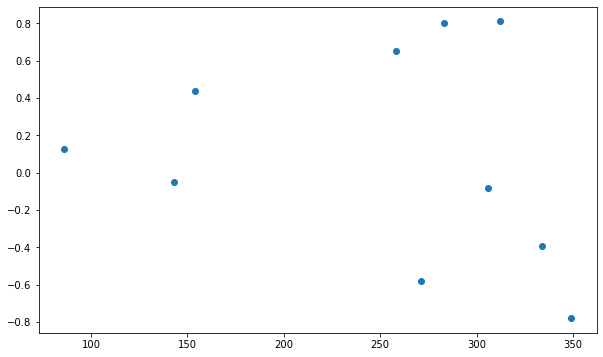

In [45]:
plt.scatter(l, b)

In [49]:
from astroplan.plots import plot_sky
my_date = Time.now()

longitude =  47.6062 * u.deg
latitude =  (122.3321 * u.deg) - 90 * u.deg
elevation = 0 * u.m
observer = EarthLocation.from_geodetic(longitude, latitude, elevation)


plot_sky(coordboy, observer, my_date)

ImportError: cannot import name '_get_download_cache_locs' from 'astropy.utils.data' (/Users/maria/anaconda3/lib/python3.7/site-packages/astropy/utils/data.py)

<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)